# MVAR Simulation for Microbiota and Metabolites

### MVAR Process

The MVAR model extends the traditional VAR model used to fit abundances over time, by incorporating metabolites. The model can be expressed as follows:

$$ X_t = A \cdot X_{t-1} + \epsilon_{X,t} $$
$$ S_t = B \cdot X_{t-1} + \epsilon_{S,t} $$

where:
- $X_t$ is the vector of microbiota abundances at time $t$,
- $S_t$ is the vector of metabolite abundances at time $t$,
- $A$ and $B$ are matrices representing the interactions within microbiota and between microbiota and metabolites, respectively,
- $\epsilon_{X,t}$ and $\epsilon_{S,t}$ are vectors of error terms, assumed to be normally distributed with mean 0 and a specific standard deviation.

### Objective

The objective of this notebook is to simulate the dynamics between microbiota and metabolites using the MVAR model. Through simulation, we aim to demonstrate how specific interactions can be identified and quantified, providing insights into the causal relationships within these systems.

### Simulation with `VARsim.py` for sVAR Models

The `VARsim.py` script has been adapted to support MVAR simulation, allowing us to specify metabolite interaction matrices and simulate the dynamics of microbiota and metabolites over time. This section demonstrates how to use the script for simulating and visualizing the interactions captured by our MVAR model.


### Example Usage of `VARsim.py` for MVAR Simulation

The implementation of the VAR model in `VARsim.py` allows for detailed simulation of the dynamic interactions between microbiota and their produced metabolites. The script is designed to facilitate straightforward simulation of these complex biological systems. The following code examples provide a guide on how to leverage the `VARsim.py` script to simulate these interactions effectively:


In [1]:
# Importing the libraries
from mimic.model_simulate.sim_VAR import *
from mimic.model_infer.infer_VAR import *

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


First, let's first generate synthetic data for microbiota using the sim_VAR class. We will then simulate the sparse interaction with a given matrix

In [2]:
# Simulate a VAR model

simulator = sim_VAR()

We can now use the following parameters to generate the metabolic data:

```json
{
    "coefficientsM": [
        [
            0.0,
            -0.5,
            0.0
        ],
        [
            0.1,
            0.1,
            -0.1
        ],
        [
            -0.2,
            0.1,
            0.3
        ]
    ],
    "initial_valuesM": [
        [
            2
        ],
        [
            0
        ],
        [
            0
        ]
    ]
}

In [3]:
simulator.read_parameters(r'parametersS.json')
simulator.print_parameters()

Model parameters:
Model: VAR
n_obs: 97
coefficients: [[ 0.8 -0.2  0.3]
 [ 0.3  0.5 -1. ]
 [ 0.2 -0.1  0.4]]
initial_values: [[1]
 [2]
 [0]]
noise_stddev: 1.2
output: show
coefficientsM: [[ 0.  -0.5  0. ]
 [ 0.1  0.1 -0.1]
 [-0.2  0.1  0.3]]
initial_valuesM: [[2]
 [0]
 [0]]


Using the following parameters for sVAR simulation: {'n_obs': 97, 'coefficients': array([[ 0.8, -0.2,  0.3],
       [ 0.3,  0.5, -1. ],
       [ 0.2, -0.1,  0.4]]), 'initial_values': array([[1],
       [2],
       [0]]), 'noise_stddev': 1.2, 'output': 'show', 'coefficientsM': array([[ 0. , -0.5,  0. ],
       [ 0.1,  0.1, -0.1],
       [-0.2,  0.1,  0.3]]), 'initial_valuesM': array([[2],
       [0],
       [0]])}


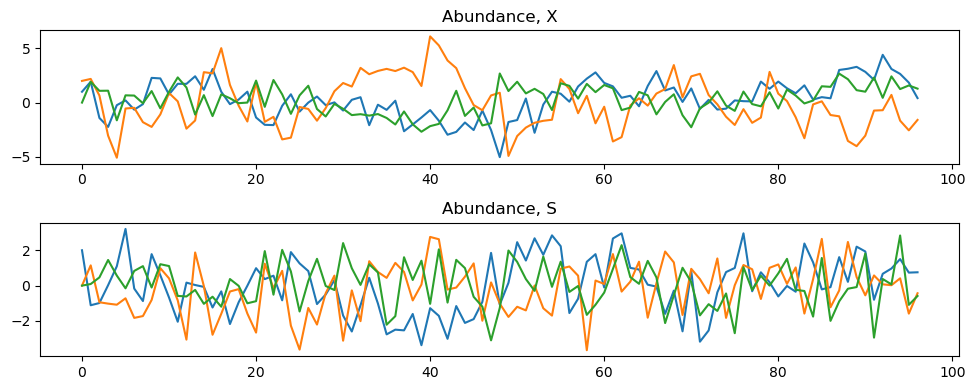

In [4]:
simulator.simulate('MVARsim')

In [5]:
data = simulator.data
print(data)

[[ 1.00000000e+00  2.00000000e+00  0.00000000e+00]
 [ 1.92209494e+00  2.18193532e+00  1.91477274e+00]
 [-1.41470766e+00  6.54066544e-01  1.08568259e+00]
 [-2.24118708e+00 -3.04738035e+00  1.09785136e+00]
 [-2.37890027e-01 -5.07995230e+00 -1.63380577e+00]
 [ 2.02456108e-01 -5.43787675e-01  6.68916076e-01]
 [-6.50049568e-01 -4.80455714e-01  6.48563723e-01]
 [-1.41720438e-01 -1.80513878e+00 -5.82638043e-02]
 [ 2.27936967e+00 -2.24007477e+00  1.06259453e+00]
 [ 2.22856242e+00 -1.08850178e+00 -5.29491665e-01]
 [ 7.47287000e-01  8.84797238e-01  1.00094894e+00]
 [ 1.73279833e+00  1.12950892e-01  2.32168914e+00]
 [ 1.72573773e+00 -2.40341820e+00  1.39177893e+00]
 [ 2.42677676e+00 -1.64890521e+00 -1.10296267e+00]
 [ 1.17966469e+00  2.80507483e+00  6.87433395e-01]
 [ 3.09298948e+00  2.69749049e+00 -1.24409760e+00]
 [ 9.98558419e-01  5.01832928e+00  7.60702304e-01]
 [-1.43169534e-01  1.62577318e+00  4.01352403e-01]
 [ 2.81259736e-01 -2.84735406e-01 -5.37543346e-02]
 [ 1.00705289e+00 -1.74162292e+

In [6]:
dataM = simulator.dataM
print(dataM)

[[ 2.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.11000852e+00  1.14562242e+00  9.09010257e-02]
 [-9.83676433e-01 -9.40449554e-01  4.64218560e-01]
 [ 2.44155389e-02 -1.01760676e+00  1.44989167e+00]
 [ 1.09441113e+00 -1.07887133e+00  5.68501026e-01]
 [ 3.20738092e+00 -7.16403609e-01 -1.51780150e-01]
 [-1.66030357e-01 -1.82399046e+00  8.31344237e-01]
 [-8.71589946e-01 -1.72121776e+00  1.10214225e+00]
 [ 1.78008047e+00 -8.11253290e-01 -1.06395059e-01]
 [ 5.86144380e-01  9.86747919e-01  1.21069822e+00]
 [-6.73712150e-01  4.10083275e-01  1.10646556e+00]
 [-2.04241363e+00 -8.32513367e-01 -5.82293447e-01]
 [ 1.69732588e-01 -3.05180229e+00 -6.13322029e-01]
 [ 3.47605162e-02  1.87532818e+00 -2.42077136e-01]
 [-7.13374282e-02 -2.42045285e-02 -1.02922396e+00]
 [-1.23669396e+00 -2.77768582e+00 -6.27025822e-01]
 [-3.24845596e-01 -1.59434658e+00 -1.19152851e+00]
 [-2.17131841e+00 -3.32438271e-01  3.71694761e-01]
 [-9.40061207e-01 -1.97944567e-01 -1.34630467e-02]
 [-5.44525282e-03 -1.57944960e+

In [7]:
infer = infer_VAR(data=data, dataS=dataM)

In [8]:
infer.run_inference_xs()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [X0h, S0h, Ah, Bh, sigma]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 21 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Ah[0, 0]  0.583  0.072   0.454    0.724      0.001    0.001    4863.0   
Ah[0, 1] -0.079  0.053  -0.178    0.022      0.001    0.001    6148.0   
Ah[0, 2]  0.374  0.093   0.192    0.541      0.001    0.001    5359.0   
Ah[1, 0]  0.324  0.069   0.177    0.442      0.001    0.001    5320.0   
Ah[1, 1]  0.503  0.051   0.411    0.604      0.001    0.000    5893.0   
Ah[1, 2] -1.072  0.091  -1.232   -0.897      0.001    0.001    5611.0   
Ah[2, 0]  0.161  0.068   0.032    0.287      0.001    0.001    4834.0   
Ah[2, 1] -0.117  0.045  -0.201   -0.035      0.001    0.001    4122.0   
Ah[2, 2]  0.323  0.083   0.159    0.470      0.001    0.001    4285.0   
Bh[0, 0]  0.021  0.331  -0.606    0.668      0.006    0.005    3038.0   
Bh[0, 1] -0.526  0.168  -0.841   -0.201      0.003    0.002    2538.0   
Bh[0, 2]  0.099  0.820  -1.493    1.648      0.015    0.013    2873.0   
Bh[1, 0]  0.086  0.350  -0.580    0.743      0.006 

           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Ah[0, 0]  0.583  0.072   0.454    0.724      0.001    0.001    4863.0   
Ah[0, 1] -0.079  0.053  -0.178    0.022      0.001    0.001    6148.0   
Ah[0, 2]  0.374  0.093   0.192    0.541      0.001    0.001    5359.0   
Ah[1, 0]  0.324  0.069   0.177    0.442      0.001    0.001    5320.0   
Ah[1, 1]  0.503  0.051   0.411    0.604      0.001    0.000    5893.0   
Ah[1, 2] -1.072  0.091  -1.232   -0.897      0.001    0.001    5611.0   
Ah[2, 0]  0.161  0.068   0.032    0.287      0.001    0.001    4834.0   
Ah[2, 1] -0.117  0.045  -0.201   -0.035      0.001    0.001    4122.0   
Ah[2, 2]  0.323  0.083   0.159    0.470      0.001    0.001    4285.0   
Bh[0, 0]  0.021  0.331  -0.606    0.668      0.006    0.005    3038.0   
Bh[0, 1] -0.526  0.168  -0.841   -0.201      0.003    0.002    2538.0   
Bh[0, 2]  0.099  0.820  -1.493    1.648      0.015    0.013    2873.0   
Bh[1, 0]  0.086  0.350  -0.580    0.743      0.006 

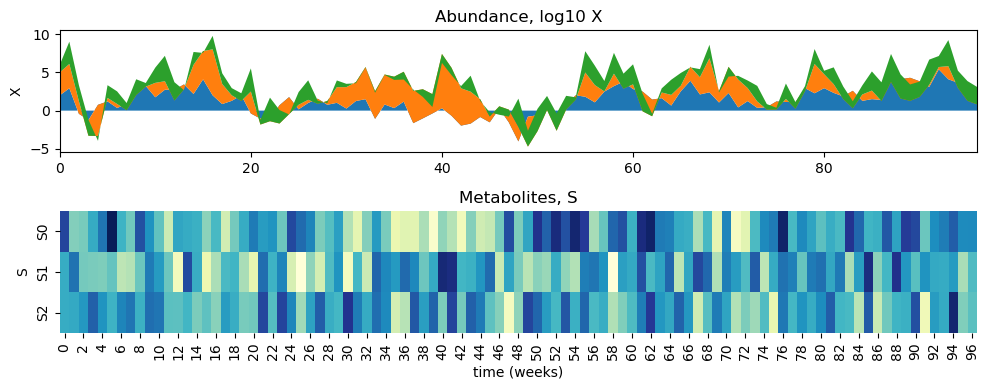

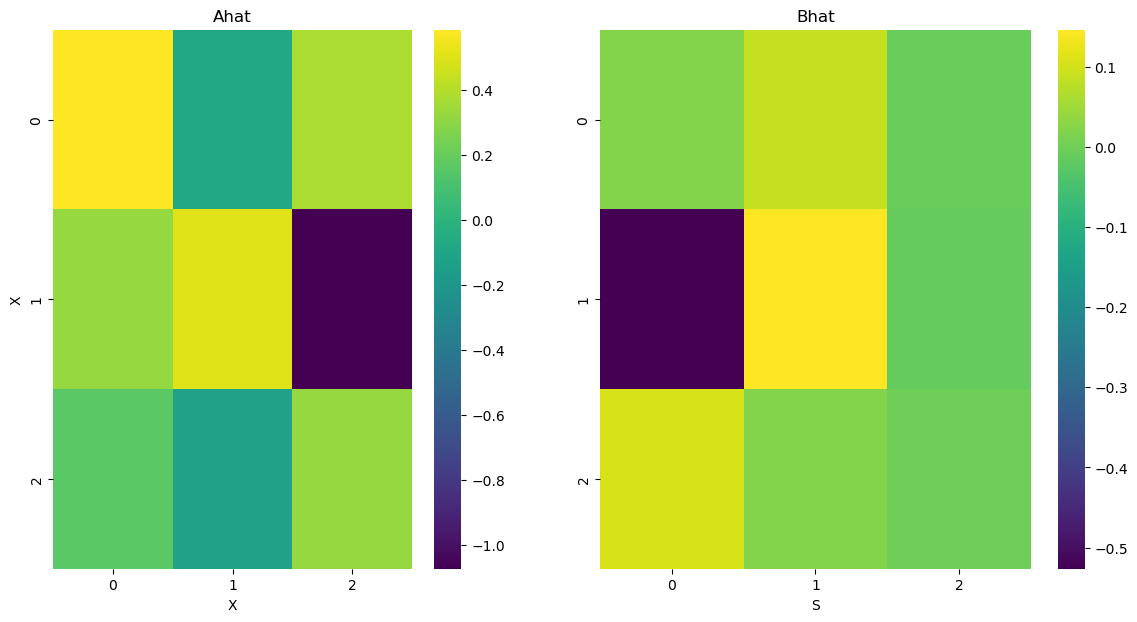

In [9]:
infer.posterior_analysis()

In [10]:
infer.run_inference_large_xs()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c2_A, tau_A, lam_A, Ah, c2_B, tau_B, lam_B, Bh, sigma]


Sampling 4 chains for 2_000 tune and 4_000 draw iterations (8_000 + 16_000 draws total) took 134 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 3457 divergences after tuning. Increase `target_accept` or reparameterize.


           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Ah[0, 0]  0.595  0.054   0.499    0.698      0.001    0.001    2400.0   
Ah[0, 1] -0.068  0.044  -0.148    0.012      0.002    0.001     646.0   
Ah[0, 2]  0.371  0.075   0.228    0.518      0.002    0.001    1893.0   
Ah[1, 0]  0.316  0.050   0.226    0.409      0.001    0.001    2067.0   
Ah[1, 1]  0.505  0.037   0.434    0.572      0.001    0.000    3309.0   
Ah[1, 2] -1.078  0.067  -1.208   -0.955      0.001    0.001    2718.0   
Ah[2, 0]  0.158  0.052   0.059    0.255      0.001    0.001    4296.0   
Ah[2, 1] -0.116  0.042  -0.196   -0.039      0.001    0.001    1095.0   
Ah[2, 2]  0.315  0.074   0.184    0.456      0.002    0.002     928.0   
Bh[0, 0]  0.012  0.044  -0.063    0.107      0.001    0.001    1969.0   
Bh[0, 1] -0.546  0.059  -0.657   -0.439      0.002    0.001     861.0   
Bh[0, 2]  0.016  0.087  -0.120    0.176      0.002    0.001    3153.0   
Bh[1, 0]  0.011  0.045  -0.068    0.106      0.001 